Veri seti guitar_dataset.csv olarak kaydedildi. Toplam örnek sayısı: 22


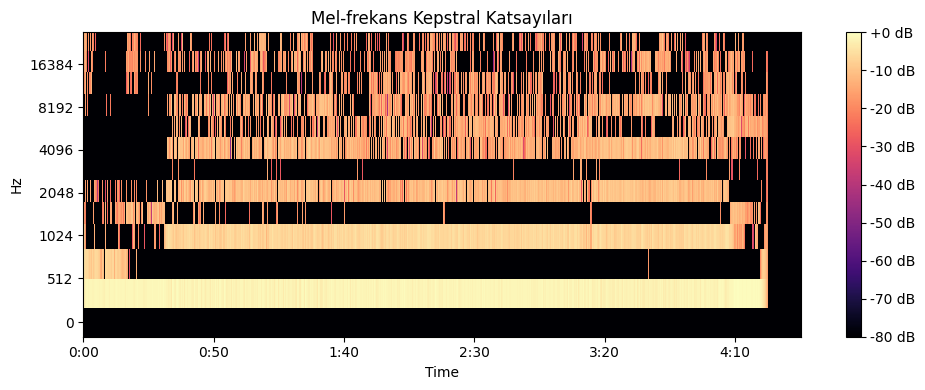

In [4]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Ses dosyalarını işleyip özellikleri ve etiketleri çıkartan fonksiyon
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y_cleaned = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y_cleaned, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean, sr  # sr değerini de döndür

# Veri setini hazırlamak için fonksiyon
def prepare_dataset(audio_folder):
    features = []
    labels = []
    
    for filename in os.listdir(audio_folder):
        if filename.endswith(".mp3") or filename.endswith(".wav"):
            file_path = os.path.join(audio_folder, filename)
            mfccs, sr = preprocess_audio(file_path)  # sr değeri burada alınır
            features.append(mfccs)

            # Dosya adını kullanarak etiket belirleme
            if "gitar" in filename.lower():
                labels.append(1)  # Gitar var
            else:
                labels.append(0)  # Gitar yok
    
    # Öznitelikleri ve etiketleri pandas DataFrame'ine dönüştür
    features = np.array(features)
    labels = np.array(labels)
    
    # DataFrame oluştur
    df = pd.DataFrame(features)
    df['label'] = labels
    
    return df, sr  # sr değerini döndür

# Ses dosyalarının bulunduğu klasör
audio_folder = "indirilen_gitar_sarkilari"  # Klasör yolunu buraya yazın

# Veri setini hazırlayın
dataset, sr = prepare_dataset(audio_folder)

# DataFrame'i CSV dosyası olarak kaydedin
output_file = "guitar_dataset.csv"  # Çıktı dosyasının adı
dataset.to_csv(output_file, index=False)

print(f"Veri seti {output_file} olarak kaydedildi. Toplam örnek sayısı: {len(dataset)}")

# MFCC'leri görselleştirmek için bir örnek ses dosyasını seçin (ilk dosya gibi)
example_file_path = os.path.join(audio_folder, os.listdir(audio_folder)[0])

# Örnek ses dosyasının MFCC'lerini görselleştirin
y, _ = librosa.load(example_file_path, sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC görselleştirmesi
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frekans Kepstral Katsayıları')
plt.tight_layout()
plt.show()


Veri seti guitar_dataset.csv olarak kaydedildi. Toplam örnek sayısı: 22


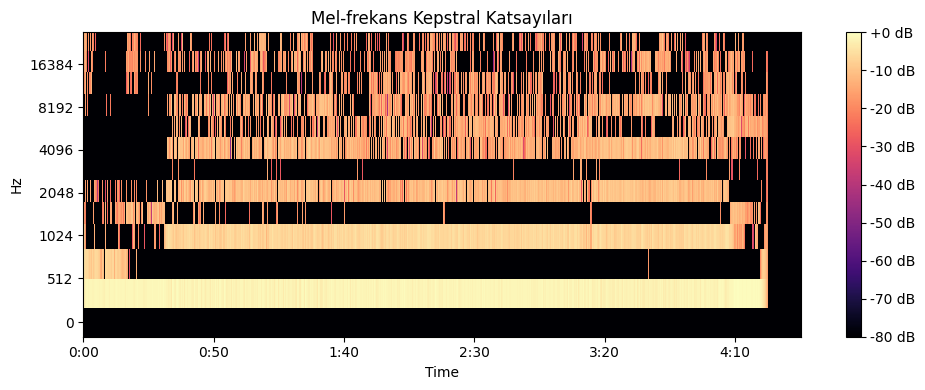

In [6]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Ses dosyalarını işleyip özellikleri ve etiketleri çıkartan fonksiyon
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=None)
    y_cleaned = librosa.effects.preemphasis(y)
    mfccs = librosa.feature.mfcc(y=y_cleaned, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    return mfccs_mean, sr  # sr değerini de döndür

# Veri setini hazırlamak için fonksiyon
def prepare_dataset(audio_folder):
    features = []
    labels = []
    
    for filename in os.listdir(audio_folder):
        if filename.endswith(".mp3") or filename.endswith(".wav"):
            file_path = os.path.join(audio_folder, filename)
            mfccs, sr = preprocess_audio(file_path)  # sr değeri burada alınır
            features.append(mfccs)

            # Dosya adını kullanarak etiket belirleme
            if "gitar" in filename.lower():
                labels.append(1)  # Gitar var
            else:
                labels.append(0)  # Gitar yok
    
    # Öznitelikleri ve etiketleri pandas DataFrame'ine dönüştür
    features = np.array(features)
    labels = np.array(labels)
    
    # DataFrame oluştur
    df = pd.DataFrame(features)
    df['label'] = labels
    
    # MFCC sütun isimlerini ayarlama
    num_mfccs = features.shape[1]  # MFCC sayısını dinamik olarak al
    df.columns = [f'MFCC_{i+1}' for i in range(num_mfccs)] + ['label']
    
    return df, sr  # sr değerini döndür

# Ses dosyalarının bulunduğu klasör
audio_folder = "indirilen_gitar_sarkilari"  # Klasör yolunu buraya yazın

# Veri setini hazırlayın
dataset, sr = prepare_dataset(audio_folder)

# DataFrame'i CSV dosyası olarak kaydedin
output_file = "guitar_dataset.csv"  # Çıktı dosyasının adı
dataset.to_csv(output_file, index=False)

print(f"Veri seti {output_file} olarak kaydedildi. Toplam örnek sayısı: {len(dataset)}")

# MFCC'leri görselleştirmek için bir örnek ses dosyasını seçin (ilk dosya gibi)
example_file_path = os.path.join(audio_folder, os.listdir(audio_folder)[0])

# Örnek ses dosyasının MFCC'lerini görselleştirin
y, _ = librosa.load(example_file_path, sr=None)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC görselleştirmesi
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frekans Kepstral Katsayıları')
plt.tight_layout()
plt.show()
